In [1]:
#imports
import numpy as np
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
#seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
#download data frame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('data/forest-fires.csv','wb')as f:
    f.write(html)

In [3]:
#reading data frame
dataFrame = pd.read_csv("data/forest-fires.csv",header =0)

In [4]:
#looking how our dataframe looks like
dataFrame.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
#encode data
dataFrame.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataFrame.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace = True)

In [6]:
dataFrame.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
dataFrame.shape

(517, 13)

In [8]:
dataFrame.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [9]:
#looking for highes correlation with area
dataFrame.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [10]:
#we can see that area has bigest correlation with temp(positive one), RH(negative) and DMC(positive)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002493FBECD68>,
      dtype=object)

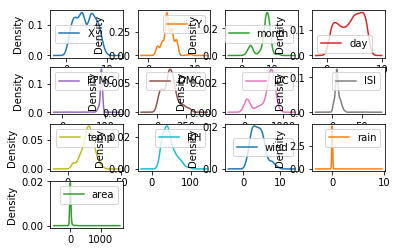

In [11]:
dataFrame.plot(kind="density",subplots=True,layout=(4,4),sharex=False,sharey=False)

In [23]:
#we can see that temp, RH and DMC has normal distribution

In [12]:
#spliting dataFrame into test and train frames
X=dataFrame.values[:,0:12]
Y=dataFrame.values[:,12]
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)

In [13]:
model = ExtraTreesRegressor()
rfe = RFE(model,3)
fit = rfe.fit(X, Y)

In [14]:
fit.n_features_

3

In [15]:
fit.support_

array([False, False, False, False, False,  True, False, False,  True,
       False,  True, False])

In [16]:
fit.ranking_[0]

5

In [17]:
print(dataFrame.columns[fit.ranking_[0]],dataFrame.columns[fit.ranking_[1]],dataFrame.columns[fit.ranking_[2]])

DMC DC temp


In [25]:
num_instances= len(X)
#models
models=[]
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElasticNet',ElasticNet()))
models.append(('BaggingRegressor',BaggingRegressor()))
models.append(('ExtraTreesRegressor',ExtraTreesRegressor()))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('SVM - linear',SVR(kernel="linear")))
models.append(('SVM - rbf',SVR(kernel="rbf")))


result = []
names = []
scoring =[]

print("No data transformation")
for name,model in models:
    #Fit model
    model.fit(trainX,trainY)
    
    predictions = model.predict(testX)
    
    #Evaluate the model
    score = explained_variance_score(testY,predictions)
    mae = mean_absolute_error(predictions,testY)
    
    result.append(mae)
    names.append(name)
    
    msg ="%s %f (%f)" % (name,score,mae)
    print(msg)

No data transformation
LinearRegression -0.012147 (21.979522)
Ridge -0.012163 (21.979073)
Lasso -0.014259 (21.878536)
ElasticNet -0.011707 (21.754902)
BaggingRegressor -0.781238 (26.731045)
ExtraTreesRegressor -1.329970 (30.535375)
KNeighborsRegressor -0.027875 (17.884827)
DecisionTreeRegressor -3.115626 (28.267500)
SVM - linear 0.002061 (15.419923)
SVM - rbf -0.000219 (15.373798)


In [26]:
scaledTrainX= preprocessing.scale(trainX)
scaledTestX= preprocessing.scale(testX)

print("Data scale transformation")
for name,model in models:
    #Fit model
    model.fit(scaledTrainX,trainY)
    
    predictions = model.predict(scaledTestX)
    
    #Evaluate the model
    score = explained_variance_score(testY,predictions)
    mae = mean_absolute_error(predictions,testY)
    
    result.append(mae)
    names.append(name)
    
    msg ="%s %f (%f)" % (name,score,mae)
    print(msg)

Data scale transformation
LinearRegression -0.010242 (21.604299)
Ridge -0.010231 (21.598719)
Lasso -0.005972 (20.928517)
ElasticNet 0.004740 (20.282414)
BaggingRegressor -0.875953 (23.948814)
ExtraTreesRegressor -1.146950 (26.989337)
KNeighborsRegressor -2.286131 (33.457962)
DecisionTreeRegressor -3.409990 (31.451923)
SVM - linear 0.000685 (15.494777)
SVM - rbf 0.001309 (15.362073)


In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
scaledTrainX= min_max_scaler.fit_transform(trainX)

scaledTestX= min_max_scaler.fit_transform(testX)

print("Data min max scaler transformation")
for name,model in models:
    #Fit model
    model.fit(scaledTrainX,trainY)
    
    predictions = model.predict(scaledTestX)
    
    #Evaluate the model
    score = explained_variance_score(testY,predictions)
    mae = mean_absolute_error(predictions,testY)
    
    result.append(mae)
    names.append(name)
    
    msg ="%s %f (%f)" % (name,score,mae)
    print(msg)

Data min max scaler transformation
LinearRegression -0.016103 (24.849034)
Ridge -0.014982 (24.069667)
Lasso 0.007443 (19.973404)
ElasticNet 0.001412 (19.756877)
BaggingRegressor -1.939791 (33.703402)
ExtraTreesRegressor -1.529970 (32.224933)
KNeighborsRegressor -1.161690 (26.556635)
DecisionTreeRegressor -17.042431 (54.444712)
SVM - linear 0.001058 (15.487470)
SVM - rbf 0.001096 (15.485219)


In [21]:
max_abs_scaler = preprocessing.MaxAbsScaler()
scaledTrainX= max_abs_scaler.fit_transform(trainX)
scaledTestX= max_abs_scaler.fit_transform(testX)
print("Data max abs scaler transformation")
for name,model in models:
    #Fit model
    model.fit(scaledTrainX,trainY)
    
    predictions = model.predict(scaledTestX)
    
    #Evaluate the model
    score = explained_variance_score(testY,predictions)
    mae = mean_absolute_error(predictions,testY)
    
    
    result.append(mae)
    names.append(name)
    
    msg ="%s %f (%f)" % (name,score,mae)
    print(msg)


Data max abs scaler transformation
LinearRegression -0.017836 (23.493594)
Ridge -0.014910 (23.225428)
Lasso 0.003212 (19.805756)
ElasticNet 0.001152 (19.738389)
BaggingRegressor -2.704747 (33.472919)
ExtraTreesRegressor -0.797845 (28.289202)
KNeighborsRegressor -1.163017 (26.806731)
DecisionTreeRegressor -10.515492 (43.380000)
SVM - linear 0.001074 (15.492243)
SVM - rbf 0.001026 (15.487515)
